https://campus.datacamp.com/courses/manipulating-time-series-data-in-python/

In [5]:
import pandas as pd
import sys 
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# DateRange Creation
# Create the range of dates here
seven_days = pd.date_range(start = '2017-1-1', periods=7) # Craig David List

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


#### Indexing & resampling 

In [ ]:
# Create dataframe prices here. Compare different years of same stock
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show();

In [ ]:
# Inspect data
print(co.info())
co = co.asfreq('D')
# Plot the data
co.plot(subplots=True)
plt.show()
# Set frequency to monthly
co = co.asfreq('M')
# Plot the data
co.plot(subplots=True)
plt.show()

#### Lags, changes, and returns for stock price series

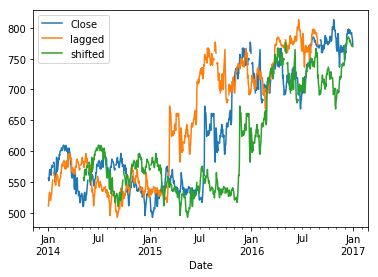

In [6]:
# Import data here
google = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot the google price series
google.plot()
plt.show()

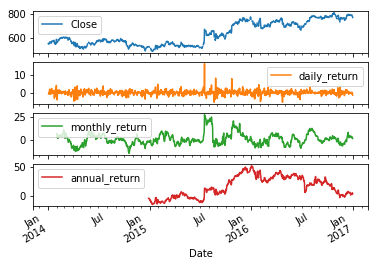

In [2]:
google = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')
# Create daily_return
google['daily_return'] = google['Close'].pct_change(1).mul(100)

# Create monthly_return
google['monthly_return'] = google['Close'].pct_change(30).mul(100)

# Create annual_return
google['annual_return'] = google['Close'].pct_change(360).mul(100)

# Plot the result
google.plot(subplots=True)
plt.show()

### Normalizing

In [ ]:
# Import data here
prices = pd.read_csv('asset_classes.csv', parse_dates=['DATE'], index_col=['DATE'])

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0, ]

# Create normalized
normalized = prices.div(first_prices).mul(100)

# Plot normalized
normalized.plot()
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
JNJ     1762 non-null float64
JPM     1762 non-null float64
XOM     1762 non-null float64
DJIA    1762 non-null float64
dtypes: float64(4)
memory usage: 68.8 KB
None


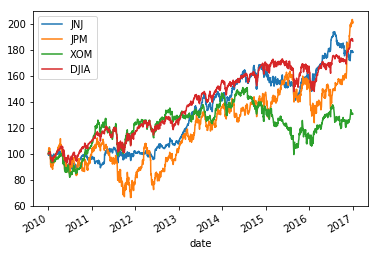

In [3]:
# Import stock prices and index here
stocks = pd.read_csv('nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv('dow_jones.csv', parse_dates=['date'], index_col='date')

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())

# Normalize and plot your data here
data.div(data.iloc[0,]).mul(100).plot()
plt.show()

### ReIndexing

In [6]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq='M')

# Create monthly here
monthly = pd.Series(data=[1,2], index=monthly_dates)
#print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq='W')

# Print monthly, reindexed using weekly_dates
#print(monthly.reindex(weekly_dates))
#print(monthly.reindex(weekly_dates, method='bfill'))
#print(monthly.reindex(weekly_dates, method='ffill'))

In [ ]:
# Import data here
data = pd.read_csv('unemployment.csv', parse_dates=['date'], index_col='date')

# Show first five rows of weekly series
print(data.asfreq('W').head())

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plot weekly_fill starting 2015 here 
weekly_ffill.loc['2015':].plot()
plt.show()

### Upsampling & Interpolation

In [ ]:
# Inspect data here
print(monthly.info())

# Create weekly dates
weekly_dates = pd.date_range(start=monthly.index.min(), end=monthly.index.max(), freq = 'W')

# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)

# Create ffill and interpolated columns
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()

# Plot weekly
weekly.plot()
plt.show()

In [ ]:
# Import & inspect data here
data = pd.read_csv('debt_unemployment.csv', parse_dates=['date'],index_col='date')
print(data.info())

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment')
plt.show()

### Higher granulatiry aggregation with time

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
Ozone    6167 non-null float64
dtypes: float64(1)
memory usage: 98.3 KB


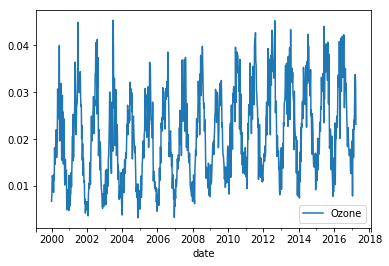

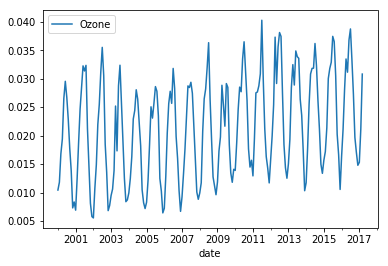

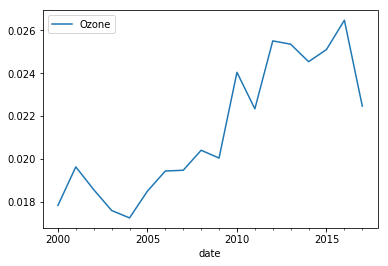

In [4]:
# Import and inspect data here
ozone = pd.read_csv('ozone_nyc.csv', parse_dates=['date'],index_col='date')
ozone.info()

# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot()
plt.show()

# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot()
plt.show()

# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot()
plt.show()

In [ ]:
# Import and inspect data here
stocks = pd.read_csv('stocks.csv', parse_dates=['date'],index_col='date')
print(stocks.info())

# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots=True)
plt.show()

In [ ]:
# Import and inspect gdp_growth here
gdp_growth = pd.read_csv('gdp_growth.csv', parse_dates=['date'], index_col='date')
gdp_growth.info()

# Import and inspect djia here
djia = pd.read_csv('djia.csv', parse_dates=['date'], index_col='date')
djia.info()

# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns = ['gdp', 'djia']

data.plot()
plt.show()

In [ ]:
# Import data here
sp500 = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')
sp500.info()

# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()

# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean','median','std'])

# Plot stats here
stats.plot()
plt.show()

### Rolling window functions

2 Window types:
* Rolling: Fixed window of time
* Expanding: Grow tith the time series

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
Ozone    6167 non-null float64
dtypes: float64(1)
memory usage: 98.3 KB
None


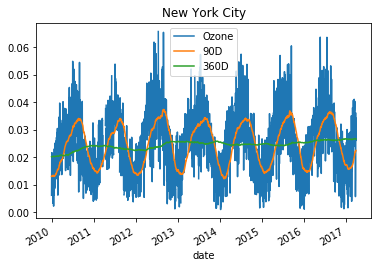

In [6]:
# Import and inspect ozone data here
data = pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Calculate 90d and 360d rolling mean for the last price
data['90D']  = data['Ozone'].rolling(window='90D').mean()
data['360D'] = data['Ozone'].rolling(window='360D').mean()

# Plot data
data['2010':].plot(title='New York City')
plt.show()

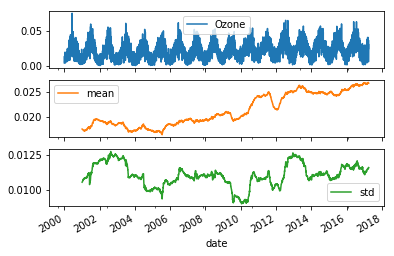

In [3]:
# Import and inspect ozone data here
data = pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col='date').dropna()

# Calculate the rolling mean and std here
rolling_stats = data['Ozone'].rolling(window=360).agg(['mean','std'])

# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

# Plot stats
stats.plot(subplots=True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
Ozone    6300 non-null float64
dtypes: float64(1)
memory usage: 98.4 KB


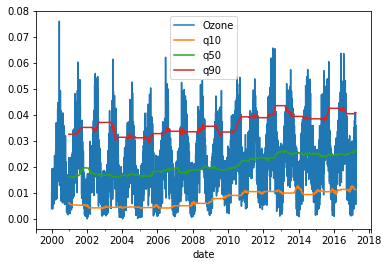

In [8]:
# Import and inspect ozone data here
data = pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col='date') 
# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()
data.info()

# Create the rolling window
rolling = data['Ozone'].rolling(window=360)

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(.1)
data['q50'] = rolling.quantile(.5)
data['q90'] = rolling.quantile(.9)

# Plot monthly returns
data.plot()
plt.show()

### Expanding Windows

In [ ]:
# Define your investment
investment = 1000

# Calculate the daily returns here
returns = data.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns.add(1)
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(1000).plot()
plt.show()

In [ ]:
# Import numpy
import numpy as np

# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) -1
    
# Calculate daily returns
daily_returns = data.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot()
plt.show()

### Random Walk

In [ ]:
# Set seed here
seed = 42

# Calculate daily_returns here
daily_returns = fb.pct_change().dropna()

# Get n_obs
n_obs = daily_returns.count()

# Create random_walk
random_walk = choice(daily_returns, size=n_obs)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Plot random_walk distribution
sns.distplot(random_walk)
plt.show()

In [ ]:
# Select fb start price here
start = fb.price.first('D')

# Add 1 to random walk and append to start
random_walk = random_walk.add(1)
random_price = start.append(random_walk)

# Calculate cumulative product here
random_price = random_price.cumprod()

# Insert into fb and plot
fb['random'] = random_price
fb.plot()
plt.show()

### Correlation

In [ ]:
# Inspect data here
print(data.info())

# Calculate year-end prices here
annual_prices = data.resample('A').last()

# Calculate annual returns here
annual_returns = annual_prices.pct_change()

# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True)
plt.show()

## Select index components

In [ ]:
# Inspect listings
print(listings.info())

# Move 'stock symbol' into the index
listings.set_index(['Stock Symbol'], inplace=True)

# Drop rows with missing 'sector' data
listings.dropna(subset=['Sector'], inplace=True)

# Select companies with IPO Year before 2019
listings = listings.loc[listings['IPO Year'] <= 2019, ]

# Inspect the new listings data
print(listings.info())

# Show the number of companies per sector
print(listings.groupby('Sector').size().sort_values(ascending=False))

In [ ]:
# Select largest company for each sector
components = listings.groupby(['Sector'])['Market Capitalization'].nlargest(1)

# Print components, sorted by market cap
print(components.sort_values(ascending=False))

# Select stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
print(tickers)

# Print company name, market cap, and last price for each component 
info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
print(listings.loc[tickers, info_cols].sort_values(['Market Capitalization'], ascending=False))

In [ ]:
# Print tickers
print(tickers)

# Import prices and inspect result
stock_prices = pd.read_csv('stock_prices.csv', parse_dates=['Date'], index_col='Date')
print(stock_prices.info())

# Calculate the returns  
price_return = stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1).mul(100)

# Plot horizontal bar chart of sorted price_return   
price_return.sort_values().plot(kind='barh', title='Stock Price Returns')
plt.show()

In [ ]:
# Select the number of shares
no_shares = components['Number of Shares']
print(no_shares.sort_values())

# Create the series of market cap per ticker
market_cap = stock_prices.mul(no_shares)

# Select first and last market cap here
first_value = market_cap.iloc[0]
last_value = market_cap.iloc[-1]

# Concatenate and plot first and last market cap here
pd.concat([first_value, last_value], axis=1).plot(kind='barh')
plt.show()

In [ ]:
# Aggregate and print the market cap per trading day
raw_index = market_cap_series.sum(axis=1)
print(raw_index)

# Normalize the aggregate market cap here 
index = raw_index.div(raw_index.iloc[0]).mul(100)
print(index)

# Plot the index here
index.plot(title='Market-Cap Weighted Index')
plt.show()

In [ ]:
# Calculate and print the index return here
index_return = (index.iloc[-1]/index.iloc[0] - 1) * 100
print(index_return)

# Select the market capitalization
market_cap = components['Market Capitalization']

# Calculate the total market cap
total_market_cap = market_cap.sum()

# Calculate the component weights, and print the result
weights = market_cap.div(total_market_cap)
print(weights.sort_values())

# Calculate and plot the contribution by component
weights.mul(index_return).sort_values().plot(kind='barh')
plt.show()

In [ ]:
# Convert index series to dataframe here
data = index.to_frame('Index')

# Normalize djia series and add as new column to data
djia = djia.div(djia.iloc[0]).mul(100)
data['DJIA'] = djia

# Show total return for both index and djia
print(data.iloc[-1].div(data.iloc[0]).sub(1).mul(100))

# Plot both series
data.plot()
plt.show()

In [ ]:
# Inspect data
print(data.info())
print(data.head())

# Create multi_period_return function here
def multi_period_return(r):
    return (np.prod(r + 1) - 1) * 100

# Calculate rolling_return_360
rolling_return_360 = data.pct_change().rolling('360D').apply(multi_period_return)

# Plot rolling_return_360 here
rolling_return_360.plot(title='Rolling 360D Return')
plt.show()

In [3]:
stock_prices = pd.read_csv('stock_data.csv', parse_dates=['Date'], index_col='Date')

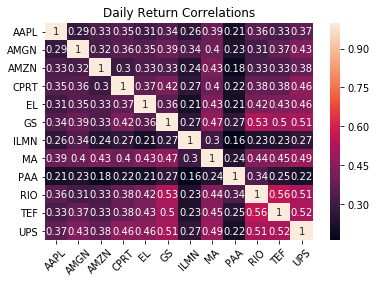

In [6]:
# Inspect stock_prices here
#print(stock_prices.info())

# Calculate the daily returns
returns = stock_prices.pct_change()

# Calculate and print the pairwise correlations
correlations = returns.corr()
#print(correlations)

# Plot a heatmap of daily return correlations
sns.heatmap(correlations, annot = True)
plt.title('Daily Return Correlations')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Inspect index and stock_prices
print(index.info())
print(stock_prices.info())

# Join index to stock_prices, and inspect the result
data = stock_prices.join(index)
print(data.info())

# Create index & stock price returns
returns = data.pct_change()

# Export data and data as returns to excel
with pd.ExcelWriter('data.xls') as writer:
    data.to_excel(excel_writer=writer, sheet_name='data')
    returns.to_excel(excel_writer=writer, sheet_name='returns')